In [1]:
import pandas as pd
import seaborn as sns

In [2]:
simulation_data_file = "../gym_ACAS2D/models/logs/testing_ACAS2D_PPO_1048576_3_100.csv"

In [3]:
simulation = pd.read_csv(simulation_data_file)

In [4]:
simulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Episode                 100 non-null    int64  
 1   Outcome                 100 non-null    object 
 2   Total Reward            100 non-null    float64
 3   Time Steps              100 non-null    int64  
 4   Path Length             100 non-null    float64
 5   Closest Approach        100 non-null    float64
 6   Final Distance to Goal  100 non-null    float64
 7   Path                    100 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 6.4+ KB


In [5]:
simulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Episode                 100 non-null    int64  
 1   Outcome                 100 non-null    object 
 2   Total Reward            100 non-null    float64
 3   Time Steps              100 non-null    int64  
 4   Path Length             100 non-null    float64
 5   Closest Approach        100 non-null    float64
 6   Final Distance to Goal  100 non-null    float64
 7   Path                    100 non-null    object 
dtypes: float64(4), int64(2), object(2)
memory usage: 6.4+ KB


In [6]:
simulation.head()

,Episode,Outcome,Total Reward,Time Steps,Path Length,Closest Approach,Final Distance to Goal,Path
0,1,Goal,1145.304445,779,933.6,152.124688,95.170782,"[(48, 400.0), (49.19999783845168, 399.99772234..."
1,2,Goal,1383.934515,635,760.8,184.365268,95.460129,"[(48, 400.0), (49.19833212633774, 399.93675353..."
2,3,Goal,1281.046410,641,768.0,163.085632,95.781295,"[(48, 400.0), (49.19999738029474, 399.99749255..."
3,4,Collision,-981.261177,595,712.8,96.627858,457.400947,"[(48, 400.0), (49.19932476129198, 400.04025067..."
4,5,Goal,1099.921297,791,948.0,119.495420,95.949258,"[(48, 400.0), (49.19811167469753, 399.93270650..."


In [7]:
simulation.describe()

,Episode,Total Reward,Time Steps,Path Length,Closest Approach,Final Distance to Goal
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,975.168096,777.250000,931.500000,141.844561,129.877960
std,29.011492,517.656515,175.313939,210.376727,21.815954,85.301727
min,1.000000,-983.836304,595.000000,712.800000,96.627858,94.946082
25%,25.750000,1113.689692,648.750000,777.300000,123.603114,95.451886
50%,50.500000,1152.585751,737.500000,883.800000,152.300471,95.679075
75%,75.250000,1233.711821,790.250000,947.100000,154.242382,95.915997
max,100.000000,1424.496818,1200.000000,1438.800000,192.510053,470.872247


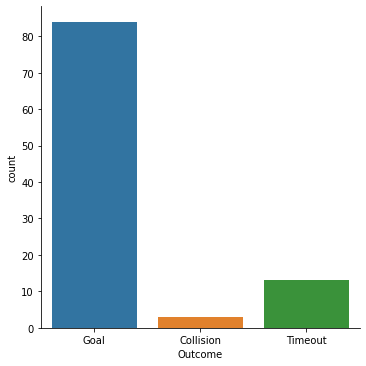

In [8]:
sns.catplot(x="Outcome", data=simulation, kind="count")

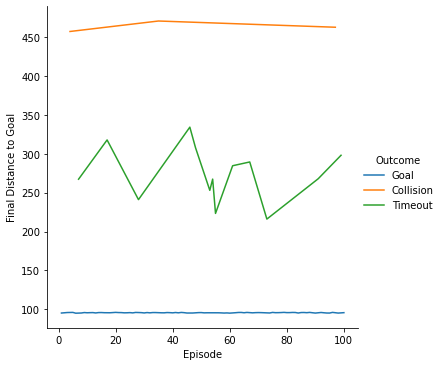

In [9]:
sns.relplot(x="Episode", y="Final Distance to Goal", data=simulation, 
            kind ="line", 
            hue="Outcome")

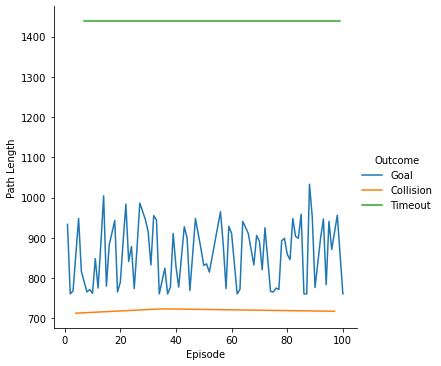

In [10]:
sns.relplot(x="Episode", y="Path Length", data=simulation, 
            kind ="line", 
            hue="Outcome")

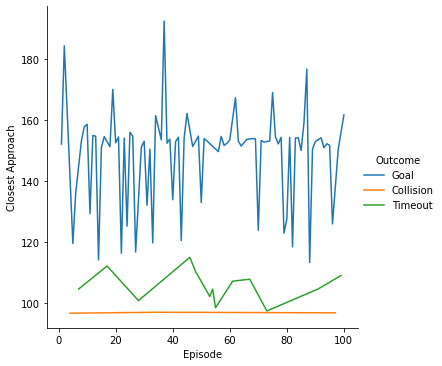

In [11]:
sns.relplot(x="Episode", y="Closest Approach", data=simulation, 
            kind ="line", 
            hue="Outcome")

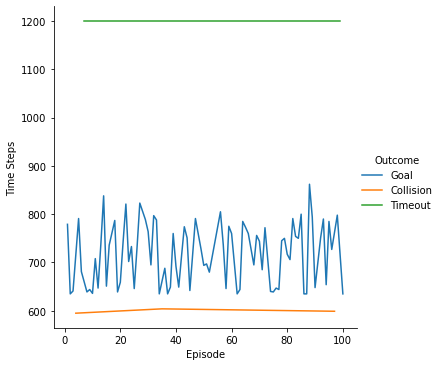

In [12]:
sns.relplot(x="Episode", y="Time Steps", data=simulation, 
            kind ="line", 
            hue="Outcome")

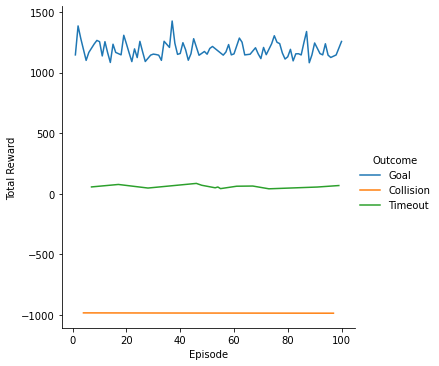

In [13]:
sns.relplot(x="Episode", y="Total Reward", data=simulation, 
            kind ="line", 
            hue="Outcome")

In [14]:
# Create paths dataframe

import ast

paths_df = pd.DataFrame()

e_values, o_values, x_values, y_values = [], [], [], []
for index, row in simulation.iterrows():
    for (x, y) in ast.literal_eval(row["Path"]):
        e_values.append(row["Episode"])
        o_values.append(row["Outcome"])
        x_values.append(x)
        y_values.append(-y)

paths_df["Episode"] = e_values
paths_df["Outcome"] = o_values
paths_df["x"] = x_values
paths_df["y"] = y_values

In [15]:
paths_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77725 entries, 0 to 77724
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Episode  77725 non-null  int64  
 1   Outcome  77725 non-null  object 
 2   x        77725 non-null  float64
 3   y        77725 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.4+ MB


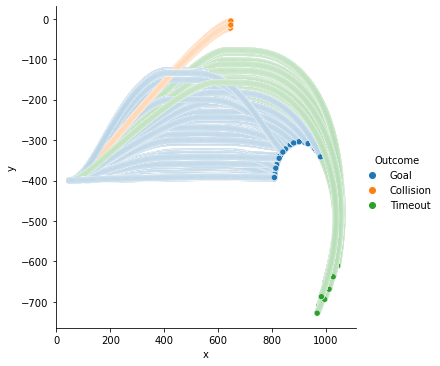

In [16]:
sns.relplot(x="x", y="y", hue="Outcome", kind="scatter", data=paths_df)

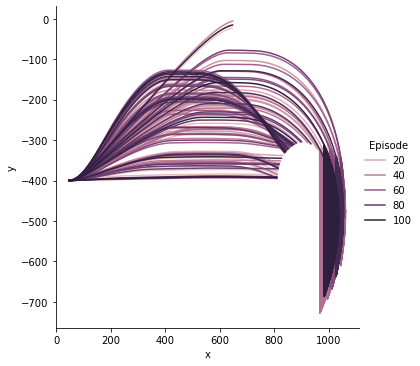

In [17]:
sns.relplot(x="x", y="y", hue="Episode", kind="line", data=paths_df)